# MEAN SHIFT clustering - Unsupervised learning
## Problem statement: Malls customer dataset (Target Marketting)
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift 

# Step 1 

## read the dataset 

In [1]:
import pandas as pd
dataset = pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Input 
### Select the 2 important columns (which has the greater influence over the clustering for type of customers)

In [2]:
x = dataset.iloc[:, [3,4]].values
print(x , type(x))

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

## Standardization

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

## Model Creation 

In [77]:
## ESTIMATE THE BANDWIDTH 
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html 

from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(x, quantile=0.1, n_samples=None)
print("Estimated bandwidth:", bandwidth)

"""
after tuning bandwidth 
0.2 = 3 clusters
0.1 = 7 clusters
other bandwidth = 0 clusters
"""

Estimated bandwidth: 0.6487582521320147


'\nafter tuning bandwidth \n0.2 = 3 clusters\n0.1 = 7 clusters\nother bandwidth = 0 clusters\n'

In [100]:
# Model creation
from sklearn.cluster import MeanShift
MeanShift_model = MeanShift(bandwidth=0.6487582521320147, bin_seeding=True)
y_label = MeanShift_model.fit_predict(x)
y_label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 0, 3,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5], dtype=int64)

In [101]:
# RESULTS
cluster_centroids = MeanShift_model.cluster_centers_
print("cluster_centroids: ", cluster_centroids)

cluster_centroids:  [[-0.21916192 -0.0123019 ]
 [ 0.6614338   1.28772555]
 [ 0.7489536  -1.45651437]
 [-1.3348523   0.95364022]
 [-1.37320883 -1.57680239]
 [ 2.56142316  1.10512043]
 [ 2.56142316 -1.14653009]]


In [102]:
# to list the methods and attributes of any algorithm - use dir() function
# dir(SpectralClustering_model)

## Create the new dataset by adding  the cluster group (type of customer category)

In [103]:
supervised = dataset 
supervised["cluster_group"] = y_label
supervised  # new dataset 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,6
197,198,Male,32,126,74,5
198,199,Male,32,137,18,6


## save the dataset in csv file 

In [104]:
supervised.to_csv("MeanShift_cluster.csv",index=False)

# Step 2 - Visual Inspection 

## to analyze the behaviour of cluster group (type of customers) -- using Seaborn [visualization techinique]

In [105]:
supervised.columns    # list of cols in new dataset 'supervised'

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster_group'],
      dtype='object')

In [106]:
# !pip install seaborn

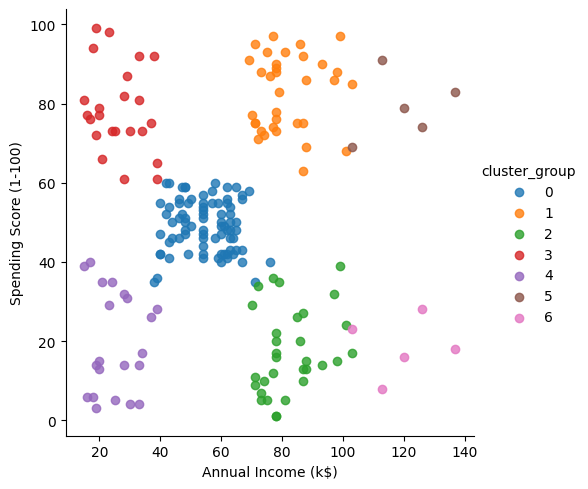

In [107]:
import seaborn as sns 
cluster_visual = sns.lmplot(data=supervised , x=supervised.columns[3] ,y=supervised.columns[4] , hue= supervised.columns[5],
                            fit_reg=False, legend=True)
# lmplot(dataset, x, y, fit_reg, legend)

In [108]:
""" 
According to the analysis of the Mall Customer dataset using mean shift Clustering  , it is performing good for mall customer dataset but 
after tuning bandwidth 
0.2 = 3 clusters
0.1 = 7 clusters
other bandwidth = 0 clusters
final decision should be made according to the domain requirement
"""

' \nAccording to the analysis of the Mall Customer dataset using mean shift Clustering  , it is performing good for mall customer dataset but \nafter tuning bandwidth \n0.2 = 3 clusters\n0.1 = 7 clusters\nother bandwidth = 0 clusters\nfinal decision should be made according to the domain requirement\n'

# Step 3 - Evaluation metric (clustering)

In [109]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, y_label)
print("Silhouette Score:", score)
# -1 → 1 (higer is better (1))

Silhouette Score: 0.5289834846040704
